# **Data Cleaning**

This notebook performs data cleaning on the *Agri-environmental indicators: all data* dataset, found on [OECD Data Explorer](https://data-explorer.oecd.org/vis?pg=0&bp=true&snb=317&tm=farm&hc[Measure]=&hc[Topic]=&hc[Unit%20of%20measure]=&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_AGRI_ENV%40DF_AEI&df[ag]=OECD.TAD.ARP&df[vs]=1.0&dq=.A.....&pd=%2C&to[TIME_PERIOD]=false&vw=ov).

The original dataset contained ***30 columns*** and ***189,817 rows***.

After cleaning, the dataset comprise ***13 columns*** and ***189,728 rows***.

## **1. Import Libraries**

Necessary libraries are loaded for data cleaning and visualization, including `pandas`, `numpy`, `matplotlib`, and `seaborn`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Load Data**

The raw CSV (dowloaded from [OECD Data Explorer](https://data-explorer.oecd.org/vis?pg=0&bp=true&snb=317&tm=farm&hc[Measure]=&hc[Topic]=&hc[Unit%20of%20measure]=&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_AGRI_ENV%40DF_AEI&df[ag]=OECD.TAD.ARP&df[vs]=1.0&dq=.A.....&pd=%2C&to[TIME_PERIOD]=false&vw=ov)) is loaded into a data frame.

In [2]:
file_path = 'OECD.TAD.ARP,DSD_AGRI_ENV@DF_AEI,1.0+.A......csv'
df = pd.read_csv(file_path, encoding='utf-8')

Basic information, column names, and the first few rows are displayed to understand the structure

In [3]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189817 entries, 0 to 189816
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   STRUCTURE                 189817 non-null  object 
 1   STRUCTURE_ID              189817 non-null  object 
 2   STRUCTURE_NAME            189817 non-null  object 
 3   ACTION                    189817 non-null  object 
 4   REF_AREA                  189817 non-null  object 
 5   Reference area            189817 non-null  object 
 6   FREQ                      189817 non-null  object 
 7   Frequency of observation  189817 non-null  object 
 8   MEASURE                   189817 non-null  object 
 9   Measure                   189817 non-null  object 
 10  EROSION_LEVEL             189817 non-null  object 
 11  Erosion risk level        189817 non-null  object 
 12  WATER_TYPE                189817 non-null  object 
 13  Water type                189817 non-null  o

In [4]:
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_VALUE,Observation value,DECIMALS,Decimals,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,BASE_PER,Base period
0,DATAFLOW,OECD.TAD.ARP:DSD_AGRI_ENV@DF_AEI(1.0),Agri-environmental indicators: all data,I,AUT,Austria,A,Annual,BRN,Nutrient removal by crop residues burned on th...,...,0.0,NaN,2,Two,A,Normal value,0,Units,NaN,NaN
1,DATAFLOW,OECD.TAD.ARP:DSD_AGRI_ENV@DF_AEI(1.0),Agri-environmental indicators: all data,I,AUT,Austria,A,Annual,BRN,Nutrient removal by crop residues burned on th...,...,0.0,NaN,2,Two,A,Normal value,0,Units,NaN,NaN
2,DATAFLOW,OECD.TAD.ARP:DSD_AGRI_ENV@DF_AEI(1.0),Agri-environmental indicators: all data,I,AUT,Austria,A,Annual,BRN,Nutrient removal by crop residues burned on th...,...,0.0,NaN,2,Two,A,Normal value,0,Units,NaN,NaN
3,DATAFLOW,OECD.TAD.ARP:DSD_AGRI_ENV@DF_AEI(1.0),Agri-environmental indicators: all data,I,AUT,Austria,A,Annual,BRN,Nutrient removal by crop residues burned on th...,...,0.0,NaN,2,Two,A,Normal value,0,Units,NaN,NaN
4,DATAFLOW,OECD.TAD.ARP:DSD_AGRI_ENV@DF_AEI(1.0),Agri-environmental indicators: all data,I,AUT,Austria,A,Annual,BRN,Nutrient removal by crop residues burned on th...,...,0.0,NaN,2,Two,A,Normal value,0,Units,NaN,NaN


In [5]:
df.columns.tolist()

['STRUCTURE',
 'STRUCTURE_ID',
 'STRUCTURE_NAME',
 'ACTION',
 'REF_AREA',
 'Reference area',
 'FREQ',
 'Frequency of observation',
 'MEASURE',
 'Measure',
 'EROSION_LEVEL',
 'Erosion risk level',
 'WATER_TYPE',
 'Water type',
 'NUTRIENTS',
 'Nutrients',
 'UNIT_MEASURE',
 'Unit of measure',
 'TIME_PERIOD',
 'Time period',
 'OBS_VALUE',
 'Observation value',
 'DECIMALS',
 'Decimals',
 'OBS_STATUS',
 'Observation status',
 'UNIT_MULT',
 'Unit multiplier',
 'BASE_PER',
 'Base period']

## **3. Data Processing**

A series of sequential transformation steps are taken for data processing.

### *3.1. Dropping redudant columns*

We select only the relevant columns. Redundant label columns are dropped. Specifically, any column carrying only descriptive text are removed, since these fields duplicate information already encoded in their coded counterparts.

In [6]:
relevant_columns = [
    "REF_AREA", "Reference area", "TIME_PERIOD",
    "OBS_VALUE", "MEASURE", "Measure",
    "Erosion risk level", "Water type", "Nutrients",
    "Unit of measure", "Observation status", "OBS_STATUS", "Unit multiplier"
]

Now, filter the dataset to only include relevant columns

In [7]:
df_clean = df[relevant_columns].copy()

### *3.2. Rename columns*

The selected columns are renamed from uppercase codes to a consistent snake case convention.

In [8]:
rename_map = {
    'REF_AREA': 'country_code',
    'Reference area': 'country',
    'Observation status': 'observation_status',
    'OBS_STATUS': 'obs_status',
    'MEASURE': 'measure_code',
    'Measure': 'measure_category',
    'Unit of measure': 'measure_unit',
    'Erosion risk level': 'erosion_risk_level',
    'Water type': 'water_type',
    'Nutrients': 'nutrients',
    'TIME_PERIOD': 'year',
    'OBS_VALUE': 'obs_value',
    'Unit multiplier': 'unit_multiplier',
}

In [9]:
rename_map = {k:v for k,v in rename_map.items() if k in df_clean.columns}
df_clean = df_clean.rename(columns=rename_map)

### *3.3. Handle Data Types and Missing Values*

Data types for `obs_value` and `year` are returned to a more suitable format for analysis. NA values for the `obs_value` are dropped.

In [10]:
df_clean["year"] = pd.to_numeric(df_clean["year"], errors="coerce").astype('Int64')
df_clean["obs_value"] = pd.to_numeric(df_clean["obs_value"], errors="coerce").astype('Float64')

In [11]:
df_clean = df_clean.dropna(subset=["obs_value", "year"])

### *3.4. Clean Country Names*

Inconsistencies, character errors, and redundancies in the `country` column are fixed.

In [12]:
def clean_country(name):
    name = name.strip()

    # Manual fixes
    replacements = {
        "China (People’s Republic of)": "China",
        "China (Peopleâ€™s Republic of)": "China",
        "Macau (China)": "Macau",
        "Hong Kong (China)": "Hong Kong",
        "Democratic Peopleâ€™s Republic of Korea": "North Korea",
        "TÃ¼rkiye": "Turkey",
        "CÃ´te dâ€™Ivoire": "Côte d'Ivoire",
        "RÃ©union": "Reunion",
        "European Union (27 countries)": "EU",
        "European Union (28 countries)": "EU",
        "Euro area (19 countries)": "EU",
        "European Union (27 countries from 01/02/2020)": "EU",
        "European Union": "EU",
    }

    # Replace corrupted or long forms
    for key, value in replacements.items():
        if name == key:
            return value

    return name

### *3.5. Analyze Cleaned Data*

Basic statistics for numerical columns are displayed, giving us a view of the dataset post-processing.

In [13]:
df_clean['country'] = df_clean['country'].apply(clean_country)

In [14]:
numerical_stats = df_clean[["obs_value", "year"]].describe()

In [15]:
numerical_stats

,obs_value,year
count,189727.0,189727.0
mean,339141.999591,2004.563415
std,1924942.640674,9.418236
min,-4251957.192,1985.0
25%,202.46,1997.0
50%,6373.779,2005.0
75%,72434.65,2012.0
max,75000000.0,2023.0


Additionally, a distribution overview for categorical columns is displayed.

In [16]:
categorical_distributions = {col: df_clean[col].value_counts().head(10) for col in df_clean.columns if df_clean[col].dtype == "object"}

In [17]:
categorical_distributions

{'country_code': country_code
 FRA    4226
 POL    4226
 SWE    4212
 FIN    4178
 NOR    4103
 CAN    4095
 AUS    4092
 USA    4073
 CZE    4051
 JPN    3981
 Name: count, dtype: int64,
 'country': country
 EU               4952
 Poland           4226
 France           4226
 Sweden           4212
 Finland          4178
 Norway           4103
 Canada           4095
 Australia        4092
 United States    4073
 Czechia          4051
 Name: count, dtype: int64,
 'measure_code': measure_code
 B0      3318
 I0      3298
 A1      3298
 OO      3298
 C000    3298
 M1      3298
 C21     3298
 A14     3294
 O1      3293
 C1      3292
 Name: count, dtype: int64,
 'measure_category': measure_category
 Forest land                       4159
 Grassland                         3726
 Manure management                 3482
 Cropland                          3415
 Balance (inputs minus outputs)    3318
 Nutrient inputs                   3298
 Net input of manure               3298
 Harvested crops  

In [18]:
df_clean.to_csv('Dataset-Cleaned.csv', index=False)

## **4. Data Visualization**

A few sample visualizations are realized for reference in the final Project.

### *4.1. Distribution plots for `obs_value` and `year`*

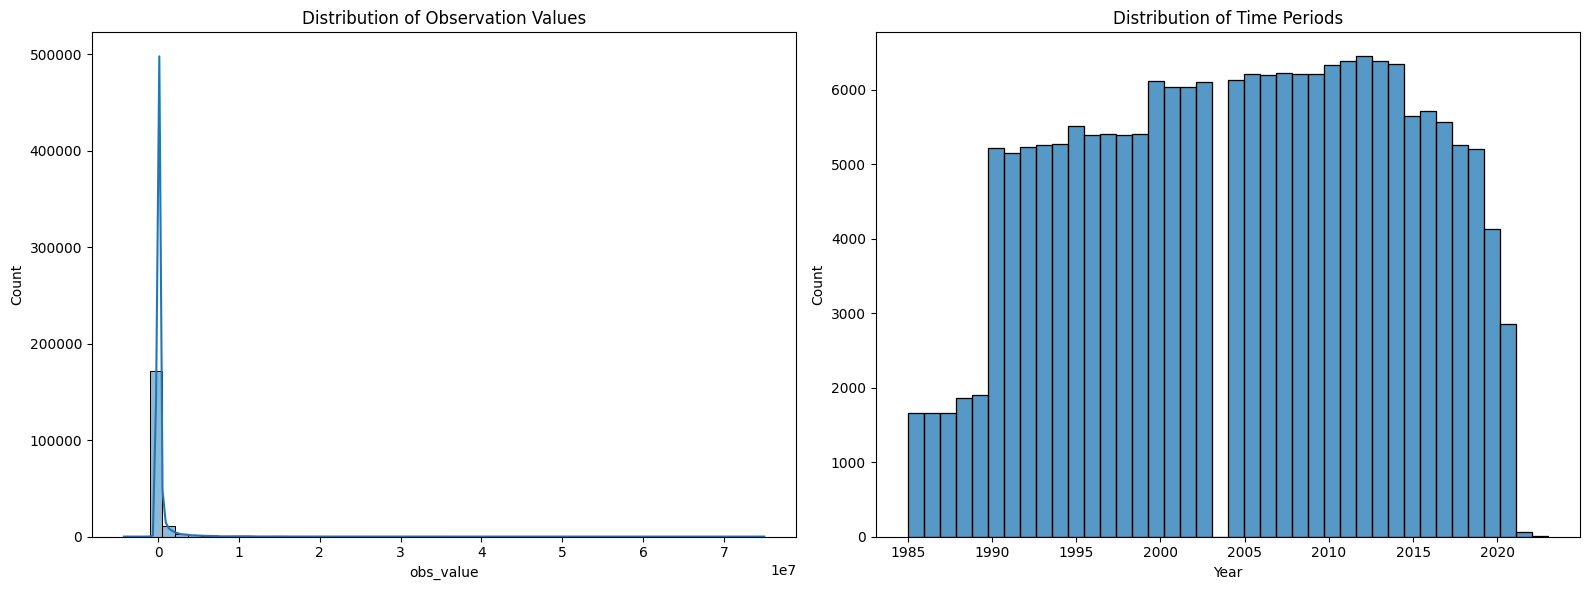

In [19]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_clean['obs_value'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Observation Values")
axes[0].set_xlabel("obs_value")

sns.histplot(df_clean['year'], bins=40, kde=False, ax=axes[1])
axes[1].set_title("Distribution of Time Periods")
axes[1].set_xlabel("Year")

plt.tight_layout()

### *4.2. Balance trends by country and year*

In [20]:
balance_df = df_clean[df_clean["measure_category"] == "Balance (inputs minus outputs)"]
balance_trends = balance_df.groupby(["country", "year"])["obs_value"].mean().reset_index()

In [21]:
# Select top 5 countries with the most data points for clarity
top_countries = balance_trends["country"].value_counts().head(5).index.tolist()
filtered_balance = balance_trends[balance_trends["country"].isin(top_countries)]

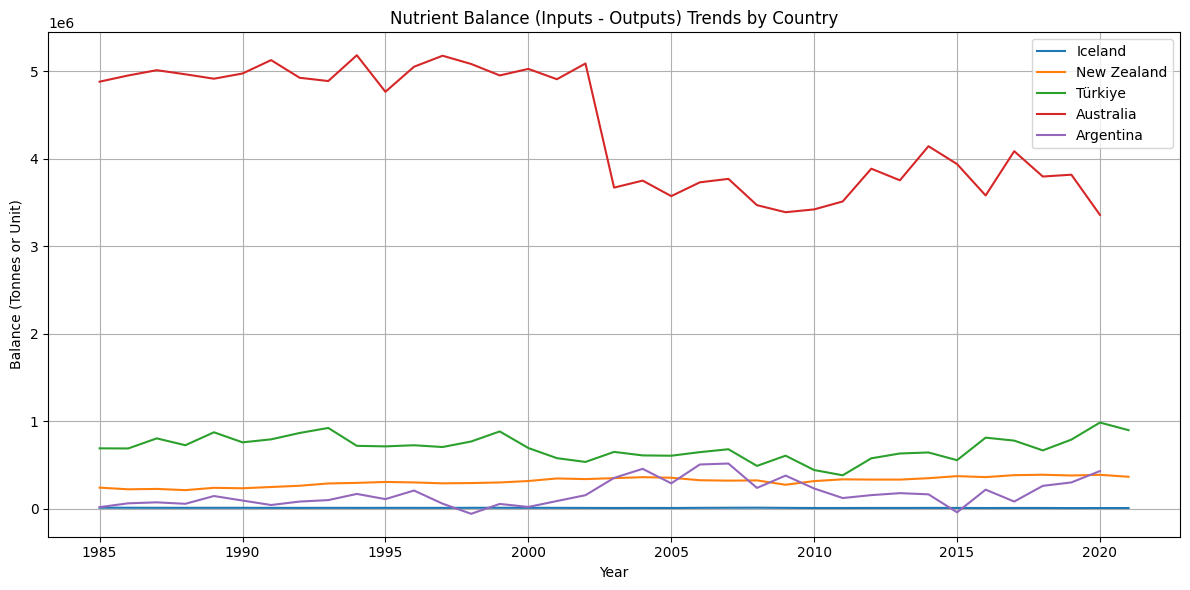

In [22]:
# Plot balance trends by year for top countries
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = filtered_balance[filtered_balance["country"] == country]
    plt.plot(country_data["year"], country_data["obs_value"], label=country)

plt.title("Nutrient Balance (Inputs - Outputs) Trends by Country")
plt.xlabel("Year")
plt.ylabel("Balance (Tonnes or Unit)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### *4.3. Nitrogen vs. Phosphorus Input-Output Comparison*

In [23]:
# Filter for Nitrogen/Phosphorus and Nutrient inputs/outputs
nitro_phos_df = df_clean[df_clean["nutrients"].isin(["Nitrogen", "Phosphorus"])
                         & df_clean["measure_category"].isin(["Nutrient inputs", "Nutrient outputs"])]

In [24]:
# Group data
grouped = nitro_phos_df.groupby(["year", "nutrients", "measure_category"])["obs_value"].sum().reset_index()
pivot_df = grouped.pivot_table(index="year", columns=["nutrients", "measure_category"], values="obs_value")

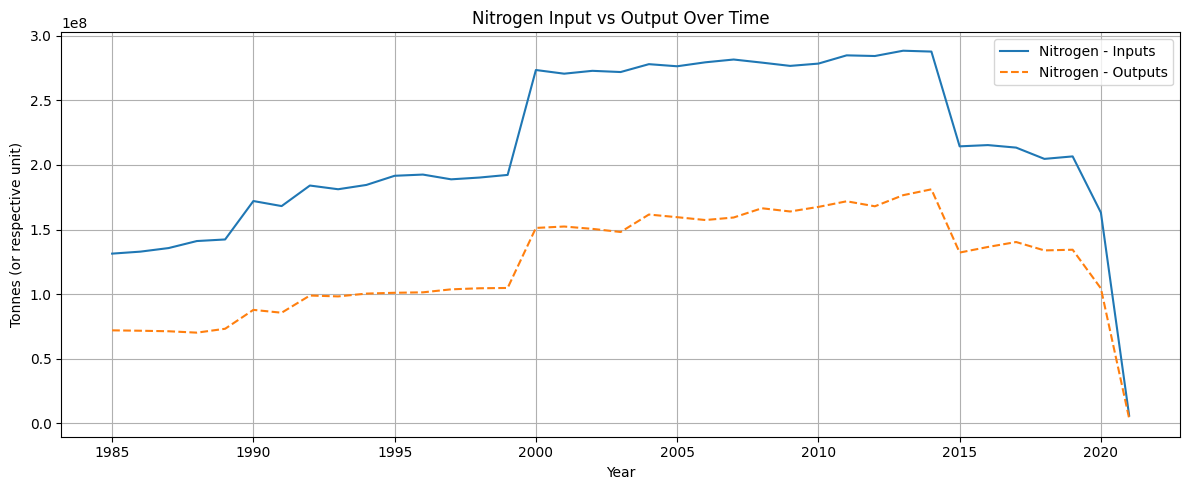

In [25]:
# Plot Nitrogen
plt.figure(figsize=(12, 5))
plt.plot(pivot_df.index, pivot_df[("Nitrogen", "Nutrient inputs")], label="Nitrogen - Inputs", linestyle='-')
plt.plot(pivot_df.index, pivot_df[("Nitrogen", "Nutrient outputs")], label="Nitrogen - Outputs", linestyle='--')
plt.title("Nitrogen Input vs Output Over Time")
plt.xlabel("Year")
plt.ylabel("Tonnes (or respective unit)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis for the Nitrogen: Inputs (e.g., fertilizers, manure) consistently exceed outputs (crop uptake). This persistent surplus suggests over-application, which may lead to soil nitrogen accumulation and pollution risks like groundwater contamination and greenhouse gas emissions.

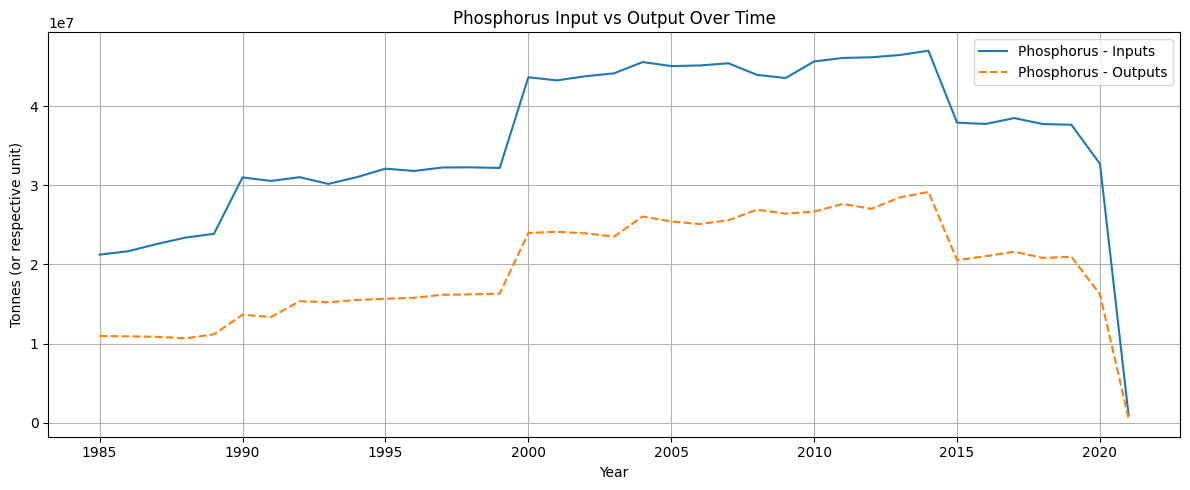

In [26]:
# Plot Phosphorus
plt.figure(figsize=(12, 5))
plt.plot(pivot_df.index, pivot_df[("Phosphorus", "Nutrient inputs")], label="Phosphorus - Inputs", linestyle='-')
plt.plot(pivot_df.index, pivot_df[("Phosphorus", "Nutrient outputs")], label="Phosphorus - Outputs", linestyle='--')
plt.title("Phosphorus Input vs Output Over Time")
plt.xlabel("Year")
plt.ylabel("Tonnes (or respective unit)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis for the Phosphorus: Also shows a surplus trend, but the gap between input and output is typically smaller than for nitrogen. Phosphorus tends to bind to soil, so excesses can build up over time and leach into waterways, causing algae blooms and ecosystem damage.

### *4.4. Manure-related Pressures*

In [27]:
# Filter for manure-related measures
manure_df = df_clean[df_clean["measure_category"].isin([
    "Livestock manure production", "Net input of manure", "Manure management"
])]

In [28]:
# Group manure data by country and measure type
manure_country_grouped = manure_df.groupby(["country", "measure_category"])["obs_value"].sum().reset_index()

In [29]:
# Pivot for heatmap-style table
manure_country_pivot = manure_country_grouped.pivot(index="country", columns="measure_category", values="obs_value")

In [30]:
# Normalize data for easier comparison (optional step)
manure_country_pivot_normalized = manure_country_pivot.div(manure_country_pivot.sum(axis=1), axis=0)

In [31]:
# Display top 10 countries with the highest total manure-related activity
top_countries = manure_country_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
manure_top10 = manure_country_pivot.loc[top_countries]

In [32]:
# Plot stacked bar chart for top 5 countries for clarity
top5 = manure_top10.head(5)

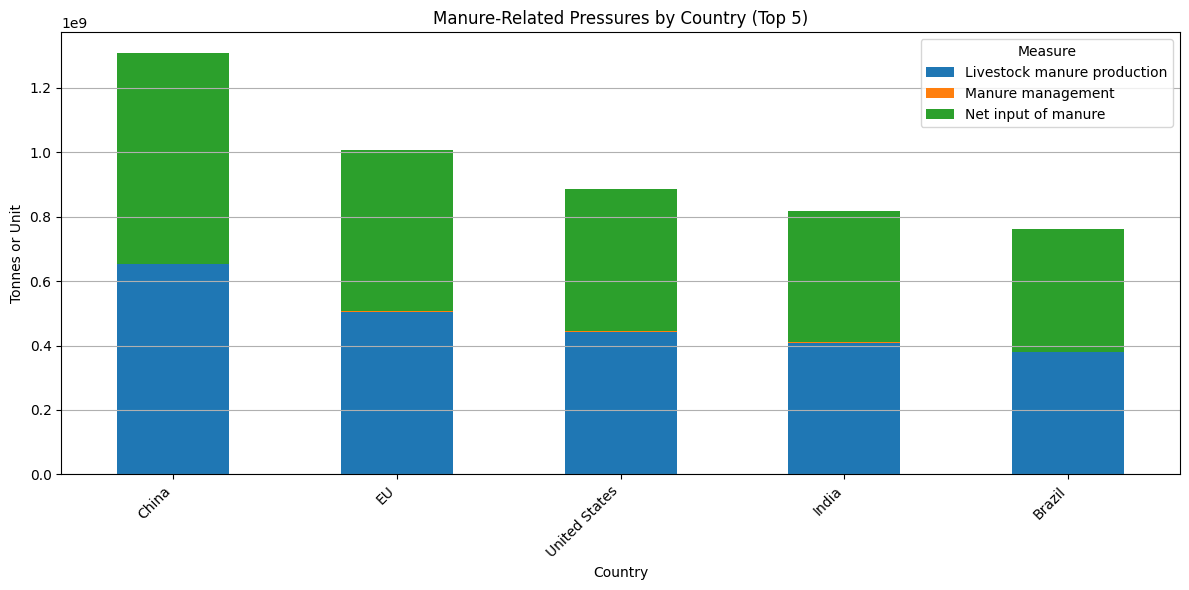

In [33]:
# Plot
top5.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Manure-Related Pressures by Country (Top 5)")
plt.ylabel("Tonnes or Unit")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Measure")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### *4.5. Erosion Risk Level Analysis*

In [34]:
# Filter relevant erosion data (excluding 'Not applicable')
erosion_df = df_clean[df_clean["erosion_risk_level"].notna() & (df_clean["erosion_risk_level"] != "Not applicable")]

In [35]:
# Group by year and erosion risk level
erosion_trend = erosion_df.groupby(["year", "erosion_risk_level"])["obs_value"].sum().reset_index()

In [36]:
# Pivot for plotting
erosion_pivot = erosion_trend.pivot(index="year", columns="erosion_risk_level", values="obs_value")

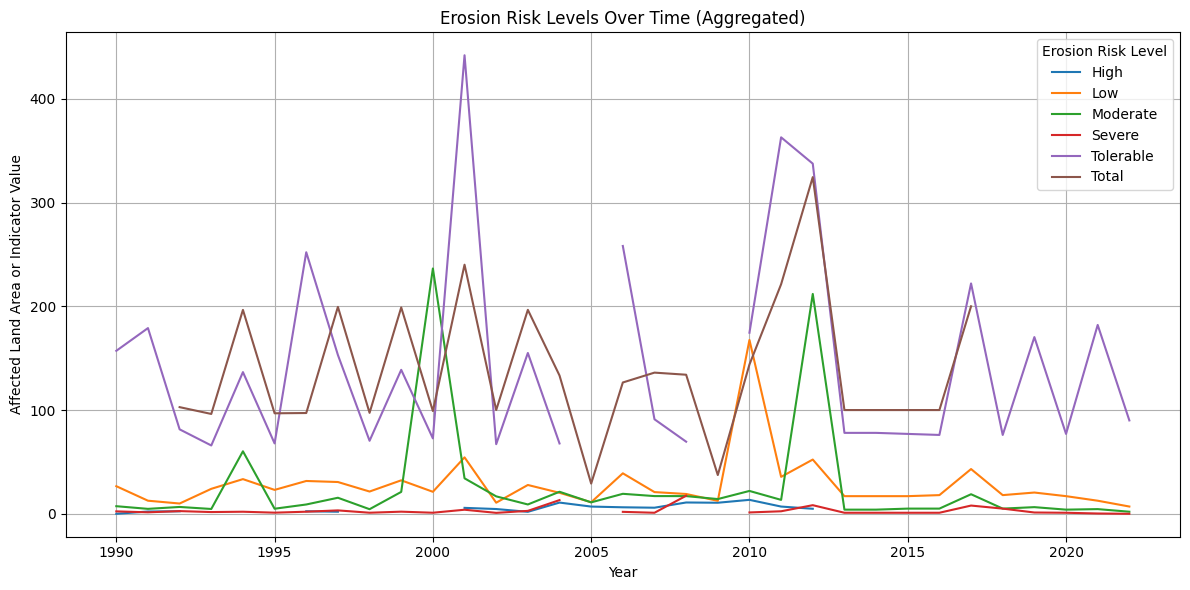

In [37]:
# Plot the erosion trends
plt.figure(figsize=(12, 6))
for column in erosion_pivot.columns:
    plt.plot(erosion_pivot.index, erosion_pivot[column], label=column)

plt.title("Erosion Risk Levels Over Time (Aggregated)")
plt.xlabel("Year")
plt.ylabel("Affected Land Area or Indicator Value")
plt.legend(title="Erosion Risk Level")
plt.grid(True)
plt.tight_layout()
plt.show()